In [171]:
import os,sys

#stats
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold \
                                    , cross_val_score ,cross_val_predict
from sklearn.base import clone
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score \
                            ,precision_recall_curve, roc_curve

# data
import sklearn.datasets
from sklearn.datasets import fetch_mldata #mldata.org is down, don't use
from tensorflow.examples.tutorials.mnist import input_data

#graphs 
import matplotlib
import matplotlib.pyplot as plt

#some variables
seed = 42 #random seed
np.random.seed(seed)

#magic
%matplotlib  inline

Get the data

In [43]:
# doesn't work :(
# mnist = fetch_mldata("MNIST original")
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


concat training and test so we can play around with these later

In [ ]:
X_train = mnist.train.images
y_train = mnist.train.labels

X_test = mnist.test.images
y_test = mnist.test.labels

In [73]:
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

In [74]:
print("images shape is {} \nlabels shape is {}".format(X.shape,
                                                       y.shape
                                                      ))

images shape is (65000, 784) 
labels shape is (65000,)


show an digit

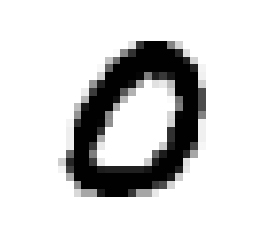

digit label is: 0


0

In [189]:
digit = np.random.randint(X.shape[0])
an_digit = X[digit]

def plot_digit(an_digit, y):
    an_digit_img = an_digit.reshape(28,28)

    plt.imshow(an_digit_img, 
               cmap = matplotlib.cm.binary,
               interpolation = "nearest"
              )

    plt.axis("off")
    plt.show()
    value = y[digit]
    print("digit label is: {}".format(value) )
    return(value)
    
plot_digit(an_digit, y)

shuffle the test and train data

In [76]:
shuffle_index = np.random.permutation(X.shape[0])

In [78]:
X = X[shuffle_index]
y = y[shuffle_index]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = seed
                                                   )

In [84]:
sgd_clf = SGDClassifier(random_state = seed)
sgd_clf.fit(X_train, y_train)

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [86]:
y_pred = sgd_clf.predict(X_test)

Decison threshold

First with a random digit

In [158]:
y_scores = sgd_clf.decision_function(X_test)

Lets take one at random, is the classifier correct?

Scores: [-38.0666784  -15.66286611  -9.49518218  -0.6971085  -12.3134865
 -23.2845019  -18.81533855   2.89098977 -32.46560341  -7.95085881] 
looks like this is a 7


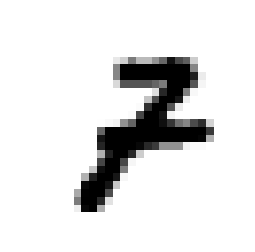

digit label is: 7
yep!


In [191]:
digit = np.random.randint(X_test.shape[0])
y_scores[digit]
print("Scores: {} \nlooks like this is a {}".format(
                                                y_scores[digit],
                                                np.argmax(y_scores[digit])
                                                   ))
value = plot_digit(X_test[digit], y = y_test)

if value == np.argmax(y_scores[digit]): 
    print("yep!")
else:
    print("NOOOOOO")

In [130]:
y_scores = cross_val_predict(sgd_clf, 
                             X_train, 
                             y_train, 
                             cv = 3, 
                             method = "decision_function"
                            )



/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defaul

Cross validation

In [196]:
print("SGD accuracy: {}".format(cross_val_score(sgd_clf, 
                                          X_train, 
                                          y_train, 
                                          cv = 3, 
                                          scoring = "accuracy"
                                         )))

/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/edd/.local/share/virtualenvs/ml_projects-PtpjDyvs/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defaul

SGD accuracy: [0.88958471 0.87400277 0.84758953]


In [92]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[1833    0    5   26    0   25   30    7   14    1]
 [   0 2055   19   18    1   19    3    4   94    1]
 [   6    6 1669   65   26   17   54   35   73    6]
 [   1    1   42 1776    4   59   13   19   33   15]
 [   0    3    7    2 1736    6   46   15   43   82]
 [  16    3   12  130   20 1381   46   10  111    7]
 [   8    2    9    1    6   18 1856    2   13    0]
 [  10    6   22   21   19    7    4 1882    9   58]
 [   8   25   31   77   24   85   28   14 1495   36]
 [  12    3    3   46   68   27    3   86   50 1675]]


<IPython.core.display.Javascript object>


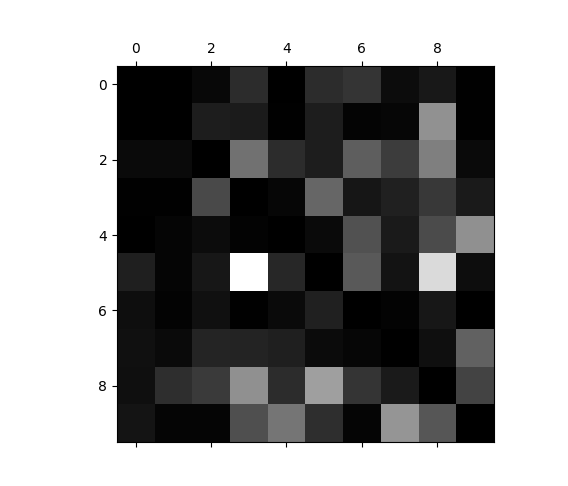

In [97]:
# compute normalised matrix
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix/row_sums
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap = plt.cm.gray)
plt.show()

looks like 3s and 5s are often confused, and we are not too good at 8s

In [201]:
def plot_digits(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [203]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

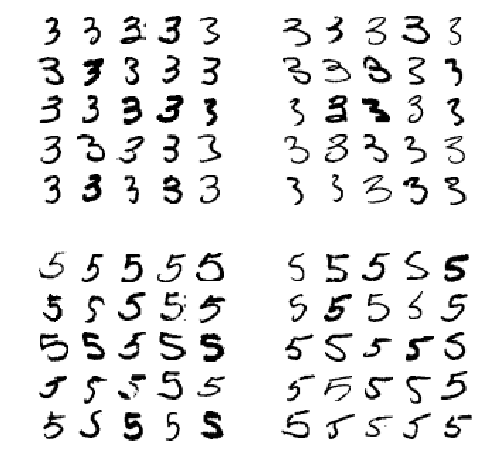

In [204]:
cl_a, cl_b = 3, 5
X_aa = X_test[(y_test == cl_a) & (y_pred == cl_a)]
X_ab = X_test[(y_test == cl_a) & (y_pred == cl_b)]
X_ba = X_test[(y_test == cl_b) & (y_pred == cl_a)]
X_bb = X_test[(y_test == cl_b) & (y_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

left shows those clast as 3s, right shows those classed as 5s

in both cases, the incorrect digits are slanted and/or not central so we would need to preprocess these images to correct this, then this classifier would improve.

It is possible that the SDG is sensitive to this so another classifier might be better.